<a href="https://colab.research.google.com/github/timlickert/Seminar_Business_Analytics/blob/main/Seminararbeit_Business_Analytics_Tim_Lickert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Preparations

##1.1 Data Preprocessing

In [1]:
#Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [2]:
# Specify the path to your CSV file
url = 'https://github.com/timlickert/Seminar_Business_Analytics/blob/main/W.csv?raw=true'
df = pd.read_csv(url, delimiter=';')

# Sort the DataFrame by "ID" ascending, "WOTAG" ascending, and "ABZEIT" ascending
df = df.sort_values(by=['ID', 'WOTAG', 'ABZEIT'])

# Filter the DataFrame based on specified conditions
filtered_df = df[(df['VMDIW'] == 41) & (df['ZWECK'].notna())]

# Convert "ABZEIT" and "ANZEIT" to real time format
filtered_df['ABZEIT'] = (filtered_df['ABZEIT'] // 100).astype(str) + ':' + (filtered_df['ABZEIT'] % 100).astype(str)
filtered_df['ANZEIT'] = (filtered_df['ANZEIT'] // 100).astype(str) + ':' + (filtered_df['ANZEIT'] % 100).astype(str)

# Calculate the time difference considering "ABZEIT" and "ANZEIT" conditions
filtered_df['Prev_ANZEIT'] = filtered_df['ANZEIT'].shift(1)
filtered_df['Time_Difference'] = pd.to_datetime('2000-01-01 ' + filtered_df['ABZEIT']) - pd.to_datetime('2000-01-01 ' + filtered_df['Prev_ANZEIT'])
filtered_df['Time_Difference'] = filtered_df['Time_Difference'].dt.total_seconds() / 60

# Replace "Time_Difference" with "-" when the row immediately before has a "ZWECK" of 7
filtered_df['Time_Difference'] = ['-'
                                  if i == 0 or (filtered_df.iloc[i - 1]['ZWECK'] == 7)
                                  else val
                                  for i, val in enumerate(filtered_df['Time_Difference'])]

# Filter rows based on "WOTAG" conditions
#filtered_df = filtered_df[filtered_df['WOTAG'] == filtered_df['WOTAG'].shift(1)]

# Convert the "Time_Difference" column to numeric
filtered_df['Time_Difference'] = pd.to_numeric(filtered_df['Time_Difference'], errors='coerce')

# Filter rows where the time difference is between 0 and 480 minutes and distance under 300 km
filtered_df = filtered_df[(filtered_df['Time_Difference'] >= 0) & (filtered_df['Time_Difference'] <= 480)]
filtered_df = filtered_df[(filtered_df['KM'] <= 300)]

# Print the filtered DataFrame
print(filtered_df)


<ipython-input-2-0b6029104992>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ABZEIT'] = (filtered_df['ABZEIT'] // 100).astype(str) + ':' + (filtered_df['ABZEIT'] % 100).astype(str)
<ipython-input-2-0b6029104992>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ANZEIT'] = (filtered_df['ANZEIT'] // 100).astype(str) + ':' + (filtered_df['ANZEIT'] % 100).astype(str)
<ipython-input-2-0b6029104992>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

       JAHR   ID  PERSNR  WOTAG  BERTAG  TEMP  REGEN  WNRT ABZEIT  ZWECK  \
24369  2016    3       1      1       1  21.5    0.0     2   8:58      7   
24377  2016    3       1      2       2  23.8    0.0     2    8:5      7   
24382  2016    3       1      2       2  23.8    0.0     7  18:10      7   
24384  2016    3       1      2       2  23.8    0.0     9  20:15      7   
24386  2016    3       1      3       3  23.1    0.0     2    8:5     11   
...     ...  ...     ...    ...     ...   ...    ...   ...    ...    ...   
67608  2017  979       1      5       2  11.8    0.0     8   22:0      7   
67610  2017  979       1      6       3  15.1    0.0     2  10:35      5   
67611  2017  979       1      6       3  15.1    0.0     3   12:5      6   
67612  2017  979       1      6       3  15.1    0.0     4  12:45      7   
67615  2017  979       1      6       3  15.1    0.0     7  19:30      7   

       VMDIW ANZEIT    KM  DAUER  SPEED   KMGEW Prev_ANZEIT  Time_Difference  
24369   

<ipython-input-2-0b6029104992>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Time_Difference'] = ['-'
<ipython-input-2-0b6029104992>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Time_Difference'] = pd.to_numeric(filtered_df['Time_Difference'], errors='coerce')


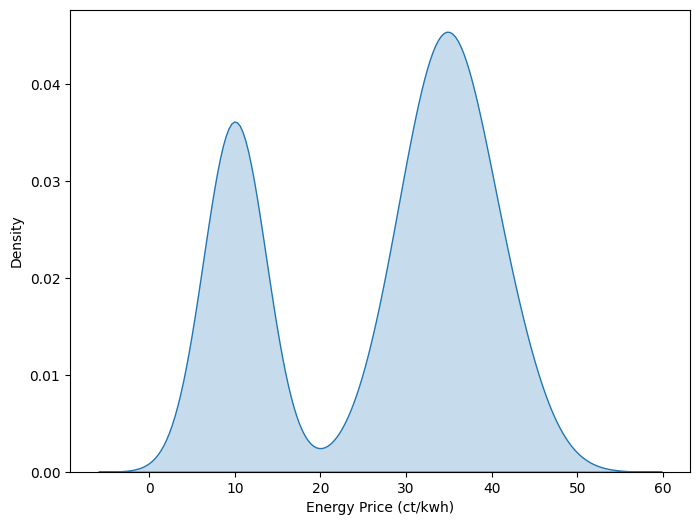

In [3]:
# Generating data for the bimodal distribution
np.random.seed(42)

# One-third with price 10 ct/kwh
num_people_10 = 1003 // 3
price_10 = np.random.normal(10, 2, num_people_10)

# Two-thirds with price 35 ct/kwh
num_people_35 =2 * (1003 // 3)
price_35 = np.random.normal(35, 5, num_people_35)

# Concatenating the data
energy_prices = np.concatenate((price_10, price_35))

out_c = energy_prices
# Creating the KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(energy_prices, fill=True)
plt.xlabel('Energy Price (ct/kwh)')
plt.ylabel('Density')
plt.show()


##1.2 Indices

In [4]:
#flexibility f

f = list(range(15, 480+1, 15))

print(f)

#customers c

c = list(range(1, 1001))

print(c)

#time slot t

t = list(range(1, 97))

print(t)


[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390, 405, 420, 435, 450, 465, 480]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 19

##1.3 Parameter

In [5]:
# Use column "KM" from dataframe
trip_distances = filtered_df['KM'].tolist()

def calculate_soc(battery_capacity, consumption_rate, trip_distance):
    energy_consumed = consumption_rate * trip_distance
    SOC = 100.0 - (energy_consumed / battery_capacity) * 100.0
    SOC = max(0.0, min(100.0, SOC))
    return SOC

# Battery capacity in kWh (Tesla Model Y)
battery_capacity = 52.0

# Consumption rate in kWh per kilometer (Tesla Model Y)
consumption_rate = 0.173

# List to store the State of Charge (SOC) for each trip
trip_socs = []

# Calculate SOC for each trip and store it in the list
for c_trip, distance in enumerate(trip_distances, start=1):
    trip_soc = calculate_soc(battery_capacity, consumption_rate, distance)
    trip_socs.append(trip_soc)
    trip_socs = trip_socs[:1000]
   # print(f"Trip {c_trip}: State of Charge (SOC): {trip_soc:.2f}%")

# trip_socs now contains the SOC values for each trip
print("List of trip SOCs:", trip_socs)

#d_c

d_c = []

for c_trip in trip_socs:
    missing_soc = c_trip
    d_c.append(52 - (missing_soc / 100) * battery_capacity)

print(d_c)


#Conventional energy cost in t

c_t = 1.5

#Utility U(d_c)

U_d_c = []

print(out_c)

for c1 in c:
  U = d_c[c1-1] * out_c[c1-1]
  U_d_c.append(U)

print(U_d_c)

List of trip SOCs: [98.93538461538462, 98.93538461538462, 98.83557692307693, 98.1701923076923, 98.93538461538462, 98.66923076923077, 98.93538461538462, 99.33461538461539, 99.33461538461539, 66.73076923076924, 73.38461538461539, 76.2125, 99.16826923076923, 97.33846153846154, 96.67307692307692, 98.66923076923077, 91.6826923076923, 91.6826923076923, 99.30134615384615, 99.73384615384616, 99.33461538461539, 99.16826923076923, 98.83557692307693, 96.34038461538462, 96.34038461538462, 99.33461538461539, 98.83557692307693, 95.3423076923077, 99.53423076923077, 98.66923076923077, 99.00192307692308, 86.02692307692308, 98.66923076923077, 95.3423076923077, 98.66923076923077, 98.93538461538462, 98.60269230769231, 95.3423076923077, 86.02692307692308, 98.66923076923077, 98.00384615384615, 98.66923076923077, 92.01538461538462, 95.675, 97.67115384615384, 95.675, 98.66923076923077, 96.34038461538462, 96.83942307692308, 98.66923076923077, 97.5048076923077, 99.66730769230769, 95.00961538461539, 99.301346153

In [6]:
#Arrival time slot of c
arrival_times = filtered_df['ANZEIT'].tolist()
timestamps = arrival_times
print(timestamps)
def timestamp_to_minutes(timestamp):
    hours, minutes = map(int, timestamp.split(':'))
    return hours * 60 + minutes

def slot_number(minutes):
    return minutes // 15

current_slot = None
slot_timestamps = {}
slot_list = []

timestamps100 = timestamps[:1000]

# Function to convert a timestamp to a 15-minute slot
def timestamp_to_slot(timestamp):
    # Split the timestamp into hours and minutes
    hours, minutes = map(int, timestamp.split(":"))

    # Calculate the total minutes from midnight
    total_minutes = hours * 60 + minutes

    # Calculate the slot (divide by 15)
    slot = total_minutes // 15
    return slot

# Convert each timestamp to a slot and store them in a list
slot_list = [timestamp_to_slot(timestamp) for timestamp in timestamps100]

# Print the list of slots
print(slot_list)

['9:2', '8:10', '18:20', '20:25', '8:10', '20:10', '8:15', '20:55', '10:0', '20:0', '12:30', '15:45', '15:55', '22:32', '22:50', '13:50', '15:45', '18:25', '19:35', '11:48', '12:33', '10:42', '11:12', '14:24', '17:43', '8:23', '11:55', '15:20', '7:42', '10:40', '18:0', '7:30', '10:40', '7:20', '10:40', '16:15', '16:40', '21:30', '7:30', '10:40', '16:15', '10:40', '14:5', '17:50', '11:3', '12:43', '14:45', '11:35', '12:7', '10:55', '14:36', '17:15', '17:30', '11:0', '11:54', '15:40', '16:42', '16:55', '12:24', '18:9', '21:50', '17:47', '18:43', '14:56', '18:30', '13:5', '11:25', '13:35', '17:25', '21:55', '13:15', '21:30', '13:15', '14:50', '9:10', '16:45', '19:45', '23:45', '11:27', '18:20', '13:30', '16:10', '17:25', '18:44', '22:57', '11:48', '19:12', '13:13', '19:20', '19:25', '11:49', '12:28', '12:59', '9:53', '10:9', '13:13', '19:21', '22:7', '14:37', '19:56', '10:45', '16:10', '17:20', '11:40', '12:48', '17:17', '9:39', '10:50', '17:35', '18:30', '20:20', '21:0', '18:49', '19:25'

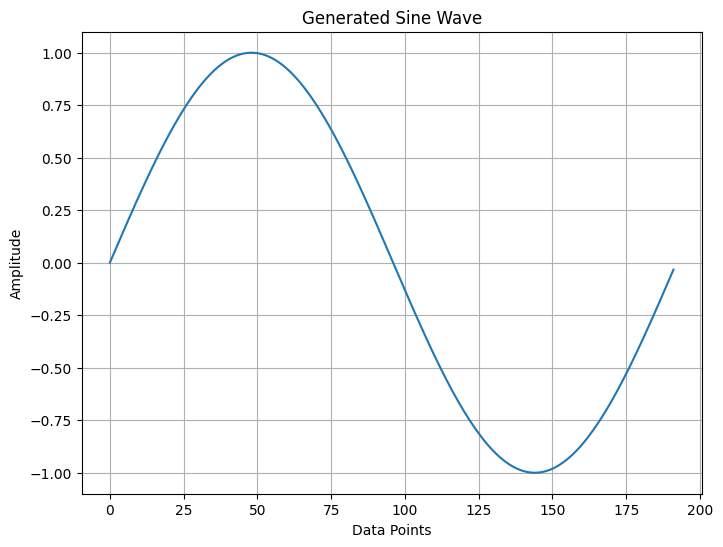

In [7]:
cycles = 1 # how many sine cycles
resolution = 192 # how many datapoints to generate

length = np.pi * 2 * cycles
my_wave = np.sin(np.arange(0, length, length / resolution))

eta_t_p = my_wave * 10
# Plot the sine wave
plt.figure(figsize=(8, 6))
plt.plot(my_wave)
plt.title('Generated Sine Wave')
plt.xlabel('Data Points')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [8]:
#Maximum flexibility of c

Time_Difference = filtered_df['Time_Difference'].tolist()
fcmax = []
# Convert durations to the nearest multiple of 15
for duration in Time_Difference:
    fcmax.append(round(duration / 15) * 15)
    fcmax = fcmax[:1000]

# Substitute zero with 15
fmax = [15 if x == 0 else x for x in fcmax]

print(fmax)


[15, 15, 30, 30, 15, 15, 15, 15, 15, 300, 15, 105, 15, 360, 15, 15, 30, 135, 60, 15, 45, 15, 15, 180, 165, 15, 120, 450, 225, 180, 45, 195, 195, 225, 180, 45, 15, 180, 195, 195, 30, 435, 45, 255, 30, 90, 15, 45, 15, 15, 60, 60, 30, 30, 15, 30, 105, 15, 150, 90, 105, 30, 15, 15, 60, 135, 15, 15, 15, 120, 60, 120, 60, 75, 15, 30, 90, 30, 120, 120, 60, 120, 60, 45, 225, 30, 30, 60, 135, 135, 75, 30, 15, 15, 15, 30, 225, 135, 90, 90, 105, 30, 60, 135, 60, 15, 15, 60, 15, 30, 105, 15, 15, 15, 75, 165, 75, 15, 195, 15, 30, 15, 15, 15, 45, 15, 150, 15, 15, 120, 15, 90, 75, 15, 225, 15, 30, 30, 15, 15, 270, 30, 120, 75, 15, 15, 75, 75, 15, 60, 45, 240, 30, 15, 135, 135, 15, 120, 60, 30, 150, 315, 60, 285, 60, 375, 15, 15, 15, 375, 375, 30, 375, 15, 30, 90, 15, 30, 30, 30, 15, 45, 15, 90, 315, 15, 15, 90, 315, 15, 15, 30, 15, 15, 90, 300, 30, 60, 15, 15, 15, 255, 45, 60, 15, 15, 15, 30, 15, 30, 30, 15, 15, 60, 300, 15, 165, 60, 15, 15, 15, 15, 30, 15, 435, 15, 15, 15, 330, 15, 15, 30, 45, 15, 3

#2. Optimization Model

In [9]:
!pip install gurobipy

import gurobipy as gp
from gurobipy import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print(gp.gurobi.version())

params = {
"WLSACCESSID": '4859a66b-d23e-4b55-be78-d3ba9e351e56',
"WLSSECRET": '7aeca1f2-9798-4725-bb3a-b49b33c8f178',
"LICENSEID": 2428138,
}
env = gp.Env(params=params)

model = gp.Model(env=env)

model.setParam('TimeLimit', 60)

model2 = gp.Model(env=env)

model2.setParam('TimeLimit', 60)

model3 = gp.Model(env=env)

model3.setParam('TimeLimit', 60)

model4 = gp.Model(env=env)

model4.setParam('TimeLimit', 60)

(10, 0, 3)
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2428138
Academic license 2428138 - for non-commercial use only - registered to ti___@stud-mail.uni-wuerzburg.de
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60
Set parameter TimeLimit to value 60


##2.1 Customer Decision

In [10]:
#Variables
u_c_max = model2.addVars(c,vtype=GRB.CONTINUOUS, lb=0, name="u_c_max")

p_f = model2.addVars(f, vtype=GRB.CONTINUOUS, lb=0, name="p_f")

delta_c = model2.addVars(c, vtype=GRB.BINARY, lb=0, name="delta_c")

In [11]:
#Objective function
obj = gp.quicksum(p_f[fmax[c1-1]] * delta_c[c1] for c1 in c)

model2.setObjective(obj, GRB.MAXIMIZE)

model2.update()

In [12]:
#Constraints
for c1 in c:
  model2.addConstr(u_c_max[c1] >= U_d_c[c1-1] - p_f[fmax[c1-1]] * d_c[c1-1])

for c1 in c:
  model2.addConstr(u_c_max[c1] <= delta_c[c1] * (U_d_c[c1-1] - (p_f[fmax[c1-1]] * d_c[c1-1])))

model2.update()

In [13]:
model2.optimize()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license 2428138 - for non-commercial use only - registered to ti___@stud-mail.uni-wuerzburg.de
Optimize a model with 1000 rows, 2032 columns and 2000 nonzeros
Model fingerprint: 0x2f9c9d65
Model has 1000 quadratic objective terms
Model has 1000 quadratic constraints
Variable types: 1032 continuous, 1000 integer (1000 binary)
Coefficient statistics:
  Matrix range     [2e-02, 5e+01]
  QMatrix range    [2e-02, 5e+01]
  QLMatrix range   [2e-01, 2e+03]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-01, 2e+03]
Presolve removed 647 rows and 1325 columns
Presolve time: 0.86s
Presolved: 1412 rows, 1766 columns, 3530 nonzeros
Presolved model has 706 SOS constraint(s)
Variable types: 1060 continuous, 7

In [14]:
model2.update()
for c1 in c:
  print(delta_c[c1])

<gurobi.Var delta_c[1] (value 0.0)>
<gurobi.Var delta_c[2] (value 0.0)>
<gurobi.Var delta_c[3] (value 0.0)>
<gurobi.Var delta_c[4] (value 0.0)>
<gurobi.Var delta_c[5] (value 0.0)>
<gurobi.Var delta_c[6] (value 0.0)>
<gurobi.Var delta_c[7] (value 0.0)>
<gurobi.Var delta_c[8] (value 0.0)>
<gurobi.Var delta_c[9] (value 0.0)>
<gurobi.Var delta_c[10] (value 0.0)>
<gurobi.Var delta_c[11] (value 0.0)>
<gurobi.Var delta_c[12] (value 0.0)>
<gurobi.Var delta_c[13] (value 0.0)>
<gurobi.Var delta_c[14] (value 0.0)>
<gurobi.Var delta_c[15] (value 0.0)>
<gurobi.Var delta_c[16] (value 0.0)>
<gurobi.Var delta_c[17] (value 0.0)>
<gurobi.Var delta_c[18] (value 0.0)>
<gurobi.Var delta_c[19] (value 0.0)>
<gurobi.Var delta_c[20] (value 0.0)>
<gurobi.Var delta_c[21] (value 0.0)>
<gurobi.Var delta_c[22] (value 0.0)>
<gurobi.Var delta_c[23] (value 0.0)>
<gurobi.Var delta_c[24] (value 0.0)>
<gurobi.Var delta_c[25] (value 0.0)>
<gurobi.Var delta_c[26] (value 0.0)>
<gurobi.Var delta_c[27] (value 0.0)>
<gurobi.Va

##2.2 Energy Dispatch

In [15]:
#Transfer results from Customer Decision to a new variable
delta_c2 = []

for c1 in c:
  delta_c2.append(delta_c[c1].x)

In [16]:
#Define demand in timeslot t with the respective customer decision considered

# Determine the total number of slots
total_slots = 96

# Create a dictionary to store the sum of values for each slot
slot_sums = {}

# Calculate the sum of values for each slot
for slot, value, c1 in zip(slot_list, d_c, c):
    slot_sums[slot] = slot_sums.get(slot, 0) + value * delta_c2[c1-1]

# Create a list with the sums, filling in 0 for missing slots
demand_t = [slot_sums.get(slot, 0) for slot in range(1, total_slots + 1)]

# Print the resulting list
print(demand_t)

[0, 0, 0, 0, 1.556999999999995, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 4.913200000000003, 0.0, 7.95799999999999, 2.04140000000001, 7.957999999999998, 11.089299999999966, 19.029999999999987, 17.45570000000001, 23.977799999999995, 3.269699999999993, 41.45079999999999, 14.94720000000001, 21.27899999999999, 35.49959999999998, 31.67629999999999, 23.891300000000022, 15.466199999999986, 7.300599999999996, 29.392699999999998, 20.75999999999999, 38.87310000000001, 25.552099999999967, 24.32379999999999, 40.810700000000026, 26.14029999999999, 44.409099999999995, 28.6488, 9.705300000000008, 17.473000000000013, 33.1295, 29.61759999999999, 33.71769999999999, 6.6085999999999885, 28.9775, 47.02139999999999, 17.127000000000002, 33.942600000000006, 32.07420000000001, 12.334900000000005, 74.58029999999997, 18.70129999999999, 35.98400000000001, 41.12209999999999, 25.41369999999997, 15.085600000000007, 101.01469999999999, 32.38559999999999, 63.17960000000001, 16.348499999999994, 2

In [17]:
#Variables
p_t = model.addVars(t,vtype=GRB.CONTINUOUS, lb=0, name="p_t")

lambda_c_t = model.addVars(c,t, vtype=GRB.CONTINUOUS, lb=0, name="lambda_c_t")

eta_t_s = model.addVars(t, vtype=GRB.CONTINUOUS, lb=0, name="eta_t_s")

model.update()

In [18]:
#Objective function
obj = gp.quicksum(eta_t_s[t1] for t1 in t) * c_t

model.setObjective(obj, GRB.MINIMIZE)

In [19]:
#Constraints
for t1 in t:
  model.addConstr(gp.quicksum(lambda_c_t[c1,t1] for c1 in c) == demand_t[t1-1])
for t1 in t:
  model.addConstr(gp.quicksum(lambda_c_t[c1, t1] for c1 in c) <= eta_t_p[t1-1] + eta_t_s[t1])

model.update()

In [20]:
model.optimize()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license 2428138 - for non-commercial use only - registered to ti___@stud-mail.uni-wuerzburg.de
Optimize a model with 192 rows, 96192 columns and 192096 nonzeros
Model fingerprint: 0xd0ed8c1f
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-01, 1e+02]
Presolve removed 192 rows and 96192 columns
Presolve time: 0.16s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6156423e+03   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.19 seconds (0.07 work units)
Optimal objective  1.615642298e+03


In [21]:
model.update()
for t1 in t:
  print(eta_t_s[t1])

<gurobi.Var eta_t_s[1] (value 0.0)>
<gurobi.Var eta_t_s[2] (value 0.0)>
<gurobi.Var eta_t_s[3] (value 0.0)>
<gurobi.Var eta_t_s[4] (value 0.0)>
<gurobi.Var eta_t_s[5] (value 0.2517380777994793)>
<gurobi.Var eta_t_s[6] (value 0.0)>
<gurobi.Var eta_t_s[7] (value 0.0)>
<gurobi.Var eta_t_s[8] (value 0.0)>
<gurobi.Var eta_t_s[9] (value 0.0)>
<gurobi.Var eta_t_s[10] (value 0.0)>
<gurobi.Var eta_t_s[11] (value 0.0)>
<gurobi.Var eta_t_s[12] (value 0.0)>
<gurobi.Var eta_t_s[13] (value 0.0)>
<gurobi.Var eta_t_s[14] (value 0.0)>
<gurobi.Var eta_t_s[15] (value 0.0)>
<gurobi.Var eta_t_s[16] (value 0.0)>
<gurobi.Var eta_t_s[17] (value 0.0)>
<gurobi.Var eta_t_s[18] (value 0.0)>
<gurobi.Var eta_t_s[19] (value 0.0)>
<gurobi.Var eta_t_s[20] (value 0.0)>
<gurobi.Var eta_t_s[21] (value 0.0)>
<gurobi.Var eta_t_s[22] (value 0.0)>
<gurobi.Var eta_t_s[23] (value 0.0)>
<gurobi.Var eta_t_s[24] (value 0.0)>
<gurobi.Var eta_t_s[25] (value 0.0)>
<gurobi.Var eta_t_s[26] (value 0.0)>
<gurobi.Var eta_t_s[27] (value 0

#3. Visualization of first Results

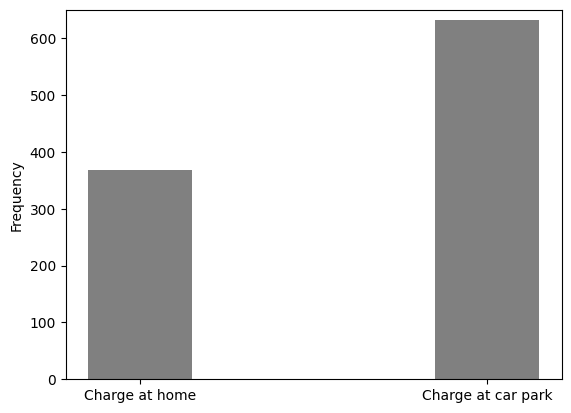

In [22]:
# Count occurrences of 0 and 1 in the list
count_0 = delta_c2.count(0)
count_1 = sum(0.9 <= value <= 1.1 for value in delta_c2)


# Data for the bar chart
values = [count_0, count_1]
labels = ['Charge at home', 'Charge at car park']

# Create bar chart with adjusted y-axis limit
plt.bar(labels, values, color=['grey', 'grey'], width=0.3)
plt.ylabel('Frequency')

# Set y-axis limit to 600
plt.ylim(0, 650)

plt.show()

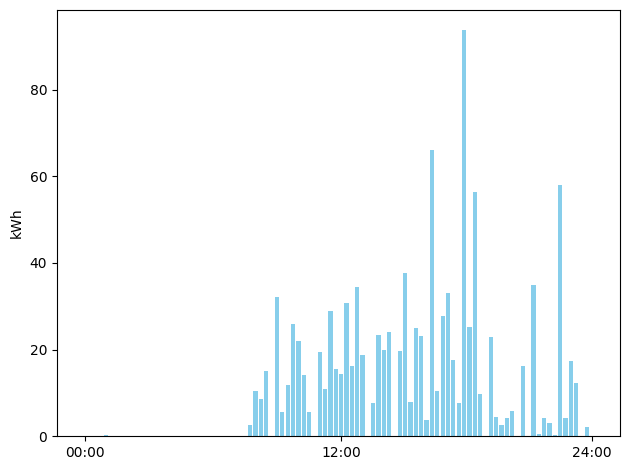

In [23]:
eta_t_s2 = []
for t1 in t:
  eta_t_s2.append(eta_t_s[t1].x)

# Create bar chart with specified x-axis ticks
plt.bar(range(len(eta_t_s2)), eta_t_s2, color='skyblue')  # Adjust the color if needed
plt.ylabel('kWh')

# Set specific ticks at the beginning, center, and end of the x-axis
ticks = [0, len(eta_t_s2) // 2, len(eta_t_s2) - 1]  # Adjust as needed
plt.xticks(ticks, ['00:00', '12:00', '24:00'])  # Labels for the specified ticks

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

#4. Sensitivity Analysis

##4.1 Sensitivity Analysis for Dispatch

In [24]:
cycles = 1 # how many sine cycles
resolution = 192 # how many datapoints to generate

length = np.pi * 2 * cycles
my_wave = np.sin(np.arange(0, length, length / resolution))

eta_t_p = my_wave * 50

In [25]:
#Variables
p_t = model4.addVars(t,vtype=GRB.CONTINUOUS, lb=0, name="p_t")

lambda_c_t = model4.addVars(c,t, vtype=GRB.CONTINUOUS, lb=0, name="lambda_c_t")

eta_t_s = model4.addVars(t, vtype=GRB.CONTINUOUS, lb=0, name="eta_t_s")

model4.update()

In [26]:
#Objective function
obj = gp.quicksum(eta_t_s[t1] for t1 in t) * c_t

model4.setObjective(obj, GRB.MINIMIZE)

In [27]:
#Constraints
for t1 in t:
  model4.addConstr(gp.quicksum(lambda_c_t[c1,t1] for c1 in c) == demand_t[t1-1])
for t1 in t:
  model4.addConstr(gp.quicksum(lambda_c_t[c1, t1] for c1 in c) <= eta_t_p[t1-1] + eta_t_s[t1])

model4.update()

In [28]:
model4.optimize()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license 2428138 - for non-commercial use only - registered to ti___@stud-mail.uni-wuerzburg.de
Optimize a model with 192 rows, 96192 columns and 192096 nonzeros
Model fingerprint: 0x0ab8e277
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 1e+02]
Presolve removed 192 rows and 96192 columns
Presolve time: 0.15s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.2149644e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.19 seconds (0.07 work units)
Optimal objective  3.214964407e+02


In [29]:
model4.update()
for t1 in t:
  print(eta_t_s[t1])

<gurobi.Var eta_t_s[1] (value 0.0)>
<gurobi.Var eta_t_s[2] (value 0.0)>
<gurobi.Var eta_t_s[3] (value 0.0)>
<gurobi.Var eta_t_s[4] (value 0.0)>
<gurobi.Var eta_t_s[5] (value 0.0)>
<gurobi.Var eta_t_s[6] (value 0.0)>
<gurobi.Var eta_t_s[7] (value 0.0)>
<gurobi.Var eta_t_s[8] (value 0.0)>
<gurobi.Var eta_t_s[9] (value 0.0)>
<gurobi.Var eta_t_s[10] (value 0.0)>
<gurobi.Var eta_t_s[11] (value 0.0)>
<gurobi.Var eta_t_s[12] (value 0.0)>
<gurobi.Var eta_t_s[13] (value 0.0)>
<gurobi.Var eta_t_s[14] (value 0.0)>
<gurobi.Var eta_t_s[15] (value 0.0)>
<gurobi.Var eta_t_s[16] (value 0.0)>
<gurobi.Var eta_t_s[17] (value 0.0)>
<gurobi.Var eta_t_s[18] (value 0.0)>
<gurobi.Var eta_t_s[19] (value 0.0)>
<gurobi.Var eta_t_s[20] (value 0.0)>
<gurobi.Var eta_t_s[21] (value 0.0)>
<gurobi.Var eta_t_s[22] (value 0.0)>
<gurobi.Var eta_t_s[23] (value 0.0)>
<gurobi.Var eta_t_s[24] (value 0.0)>
<gurobi.Var eta_t_s[25] (value 0.0)>
<gurobi.Var eta_t_s[26] (value 0.0)>
<gurobi.Var eta_t_s[27] (value 0.0)>
<gurobi.Va

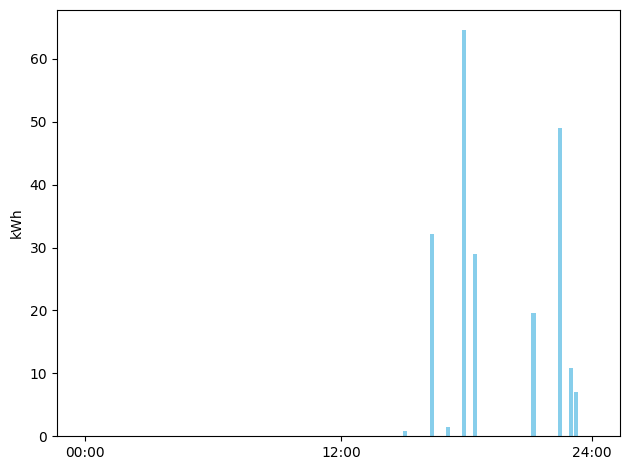

In [30]:
eta_t_s2 = []
for t1 in t:
  eta_t_s2.append(eta_t_s[t1].x)

# Create bar chart with specified x-axis ticks
plt.bar(range(len(eta_t_s2)), eta_t_s2, color='skyblue')  # Adjust the color if needed
plt.ylabel('kWh')

# Set specific ticks at the beginning, center, and end of the x-axis
ticks = [0, len(eta_t_s2) // 2, len(eta_t_s2) - 1]
plt.xticks(ticks, ['00:00', '12:00', '24:00'])  # Labels for the specified ticks

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

##4.2 Sensitivity Analysis for Customer Decision

In [31]:
# Generating data for the bimodal distribution
np.random.seed(42)

# One-third with price 10 ct/kwh
num_people_10 = 1003 // 2
price_10 = np.random.normal(10, 2, num_people_10)

# Two-thirds with price 35 ct/kwh
num_people_35 = (1003 // 2)
price_35 = np.random.normal(35, 5, num_people_35)

# Concatenating the data
energy_prices = np.concatenate((price_10, price_35))

out_c = energy_prices

In [32]:
U_d_c = []

print(out_c)

for c1 in c:
  U = d_c[c1-1] * out_c[c1-1]
  U_d_c.append(U)

print(U_d_c)

[10.99342831  9.7234714  11.29537708 ... 37.86291391 41.99677718
 39.62316841]
[6.0859619102139915, 5.382913765743225, 6.839350819639931, 12.41332581674451, 5.276745383506283, 6.595954451582336, 7.284504429329729, 3.9910648325737728, 3.1351237249329817, 191.77257750807436, 125.57259826295108, 112.17331162642537, 4.534297364904668, 8.544040282787218, 11.331784299504932, 6.141794059530496, 34.489010809107256, 45.96823942694915, 2.97322970672625, 0.9930743354703712, 4.47422894809367, 4.12970350007919, 6.136776655877068, 13.607408403271574, 16.958079350457144, 3.536758432079192, 4.661146777741586, 26.0398812008664, 2.1310506186033034, 6.516295850286107, 4.5654285365058715, 99.57730657728386, 6.901319840962701, 19.096448260137596, 8.058402158350816, 4.184281910752053, 7.569520576260887, 14.727357919926348, 53.35880033740799, 7.192455950442869, 11.913056620070517, 7.15717370116692, 40.559656663047996, 21.135635577239402, 8.52901973933008, 19.25214075064062, 6.282475940991655, 23.053407192989

In [33]:
#Variables
u_c_max = model3.addVars(c,vtype=GRB.CONTINUOUS, lb=0, name="u_c_max")

p_f = model3.addVars(f, vtype=GRB.CONTINUOUS, lb=0, name="p_f")

delta_c = model3.addVars(c, vtype=GRB.BINARY, lb=0, name="delta_c")

In [34]:
#Objective function
obj = gp.quicksum(p_f[fmax[c1-1]] * delta_c[c1] for c1 in c)

model3.setObjective(obj, GRB.MAXIMIZE)

model3.update()

In [35]:
#Constraints
for c1 in c:
  model3.addConstr(u_c_max[c1] >= U_d_c[c1-1] - p_f[fmax[c1-1]] * d_c[c1-1])

for c1 in c:
  model3.addConstr(u_c_max[c1] <= delta_c[c1] * (U_d_c[c1-1] - (p_f[fmax[c1-1]] * d_c[c1-1])))

model3.update()

In [36]:
model3.update()
model3.optimize()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license 2428138 - for non-commercial use only - registered to ti___@stud-mail.uni-wuerzburg.de
Optimize a model with 1000 rows, 2032 columns and 2000 nonzeros
Model fingerprint: 0xfecc9412
Model has 1000 quadratic objective terms
Model has 1000 quadratic constraints
Variable types: 1032 continuous, 1000 integer (1000 binary)
Coefficient statistics:
  Matrix range     [2e-02, 5e+01]
  QMatrix range    [2e-02, 5e+01]
  QLMatrix range   [2e-01, 1e+03]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-01, 1e+03]
Presolve removed 647 rows and 1325 columns
Presolve time: 0.93s
Presolved: 1412 rows, 1766 columns, 3530 nonzeros
Presolved model has 706 SOS constraint(s)
Variable types: 1060 continuous, 7

In [37]:
model3.update()
for c1 in c:
  print(delta_c[c1])

<gurobi.Var delta_c[1] (value 0.0)>
<gurobi.Var delta_c[2] (value 0.0)>
<gurobi.Var delta_c[3] (value 0.0)>
<gurobi.Var delta_c[4] (value 0.0)>
<gurobi.Var delta_c[5] (value 0.0)>
<gurobi.Var delta_c[6] (value 0.0)>
<gurobi.Var delta_c[7] (value 0.0)>
<gurobi.Var delta_c[8] (value 0.0)>
<gurobi.Var delta_c[9] (value 0.0)>
<gurobi.Var delta_c[10] (value 0.0)>
<gurobi.Var delta_c[11] (value 0.0)>
<gurobi.Var delta_c[12] (value 0.0)>
<gurobi.Var delta_c[13] (value 0.0)>
<gurobi.Var delta_c[14] (value 0.0)>
<gurobi.Var delta_c[15] (value 0.0)>
<gurobi.Var delta_c[16] (value 0.0)>
<gurobi.Var delta_c[17] (value 0.0)>
<gurobi.Var delta_c[18] (value 0.0)>
<gurobi.Var delta_c[19] (value 0.0)>
<gurobi.Var delta_c[20] (value 0.0)>
<gurobi.Var delta_c[21] (value 0.0)>
<gurobi.Var delta_c[22] (value 0.0)>
<gurobi.Var delta_c[23] (value 0.0)>
<gurobi.Var delta_c[24] (value 0.0)>
<gurobi.Var delta_c[25] (value 0.0)>
<gurobi.Var delta_c[26] (value 0.0)>
<gurobi.Var delta_c[27] (value 0.0)>
<gurobi.Va

In [38]:
#Transfer results from Customer Decision to a new variable
delta_c2 = []

for c1 in c:
  delta_c2.append(delta_c[c1].x)

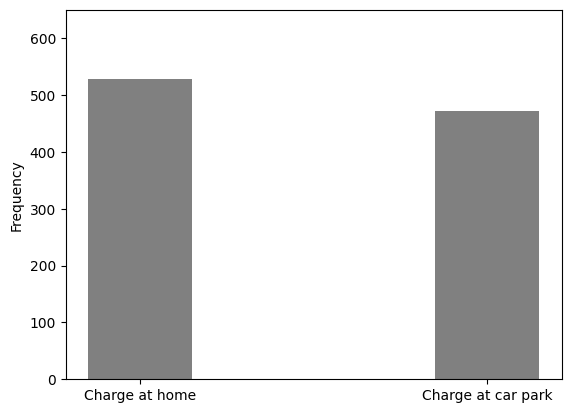

In [39]:
# Count occurrences of 0 and 1 in the list
count_0 = delta_c2.count(0)
count_1 = sum(0.9 <= value <= 1.1 for value in delta_c2)


# Data for the bar chart
values = [count_0, count_1]
labels = ['Charge at home', 'Charge at car park']

# Create bar chart with adjusted y-axis limit
plt.bar(labels, values, color=['grey', 'grey'], width=0.3)
plt.ylabel('Frequency')

# Set y-axis limit to 600
plt.ylim(0, 650)

plt.show()